In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

In [2]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=2000
steps=7800

# 50 stars

## make an array of just the observational times

In [3]:
L50=np.load('/home/lee/data/cluster_size_change/100x_burst/L50.npy')

In [4]:
cluster_size50=50
cad_L50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
            cad_L50[i,j,k]=L50[i,j,t_list_cadence[k]]

In [5]:
print(cad_L50[6,24,:])

[-2.77899631  2.22100369  2.22100369  2.22100369  2.22100369  2.22100369
  2.22100369  2.22100369  2.22100369  2.22100369  2.22100369  2.22100369]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [6]:
obs_burst50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(1,12):
            if cad_L50[i,k,j]-cad_L50[i,k,j-1]==5:
                    obs_burst50[i,k,j-30:j]=1
                    print(i,k)
            elif cad_L50[i,k,j-1]-cad_L50[i,k,j]==5:
                    obs_burst50[i,k,j:j+30]=1

6 24
6 28
6 38
13 30
18 9
27 3
28 7
32 22
32 33
34 23
39 43
40 23
41 34
45 17
47 4
47 11
49 27


In [7]:
print(obs_burst50[6,24,:])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## count the number of zeros and ones

In [8]:
num100_50=0
list100_50=[]
num0_50=0
list0_50=[]

for i in range(run):
    for k in range(cluster_size50):
        for j in range(0,12):
            if obs_burst50[i,k,j]==1:
                num100_50+=1
            elif obs_burst50[i,k,j]==0:
                num0_50+=1
    list100_50.append(num100_50)
    num100_50=0
    list0_50.append(num0_50)
    num0_50=0

In [9]:
print(list0_50)

[578, 600, 589, 600, 589, 600, 597, 589, 578, 578, 600, 583, 600, 599, 597, 600, 578, 600, 599, 600, 600, 600, 600, 600, 600, 589, 600, 593, 599, 589, 600, 599, 591, 600, 599, 600, 578, 600, 600, 595, 599, 599, 600, 600, 600, 599, 600, 598, 600, 578]


## convert it to mass

In [10]:
mass100_50=[]
mass0_50=[]
for i in range(run):
    mass100_50.append(list100_50[i]*100)
    mass0_50.append(list0_50[i]*1)

## find fraction

In [11]:
frac100_50=[]
frac0_50=[]
for i in range(run):
    total50=mass100_50[i]+mass0_50[i]
    frac100_50.append(100*mass100_50[i]/total50)
    frac0_50.append(100*mass0_50[i]/total50)

## plot it

/tmp/ipykernel_60501/834010404.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


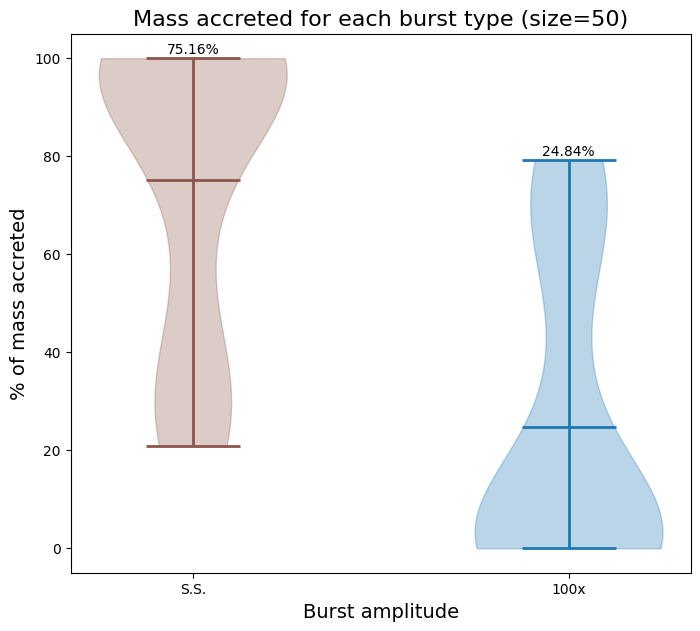

In [12]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac100_50,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_50))
string100='{:.2f}%'.format(np.mean(frac100_50))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_50)+1,string0,ha='center')
ax1.text(2,np.max(frac100_50)+1,string100,ha='center')
plt.title('Mass accreted for each burst type (size=50)',fontsize=16)
plt.show()    

# 100 stars

## make an array of just observational times

In [13]:
burst100=np.load('/home/lee/data/cluster_size_change/100x_burst/burst100.npy')
L100=np.load('/home/lee/data/cluster_size_change/100x_burst/L100.npy')
C100=np.load('/home/lee/data/cluster_size_change/100x_burst/C100.npy')

In [14]:
cluster_size100=100
cad_L100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for j in range(cluster_size100):
        for k in range(len(t_list_cadence)):
            cad_L100[i,j,k]=L100[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [15]:
obs_burst100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for k in range(cluster_size100):
        for j in range(1,12):
            if cad_L100[i,k,j]-cad_L100[i,k,j-1]==5:
                    obs_burst100[i,k,j-30:j]=1
            elif cad_L100[i,k,j-1]-cad_L100[i,k,j]==5:
                    obs_burst100[i,k,j:j+30]=1

## Count number of zeros and ones

In [16]:
num100_100=0
list100_100=[]
num0_100=0
list0_100=[]

for i in range(run):
    for k in range(cluster_size100):
        for j in range(0,12):
            if obs_burst100[i,k,j]==1:
                num100_100+=1
            elif obs_burst100[i,k,j]==0:
                num0_100+=1
    list100_100.append(num100_100)
    num100_100=0
    list0_100.append(num0_100)
    num0_100=0

## convert to mass

In [17]:
mass100_100=[]
mass0_100=[]
for i in range(run):
    mass100_100.append(list100_100[i]*100)
    mass0_100.append(list0_100[i]*1)

## find fraction

In [18]:
frac100_100=[]
frac0_100=[]
for i in range(run):
    total100=mass100_100[i]+mass0_100[i]
    frac100_100.append(100*mass100_100[i]/total100)
    frac0_100.append(100*mass0_100[i]/total100)

## plot it

/tmp/ipykernel_60501/2719551353.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


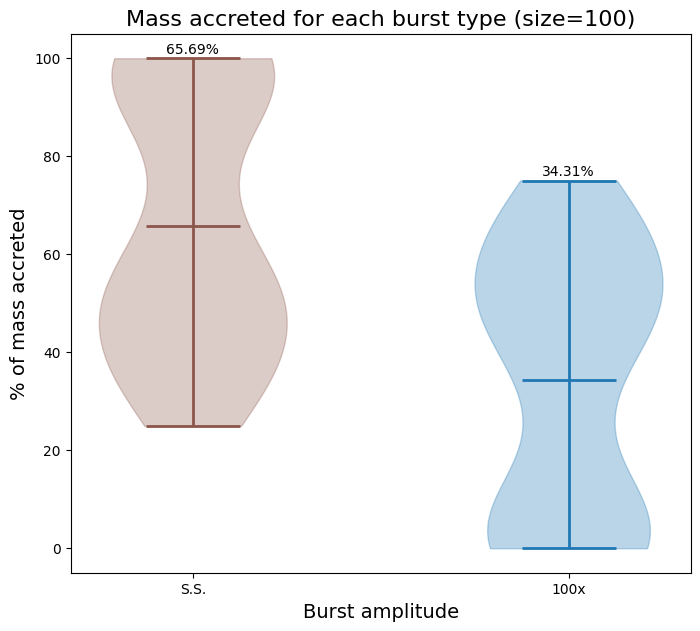

In [19]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac100_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_100,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_100))
string100='{:.2f}%'.format(np.mean(frac100_100))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_100)+1,string0,ha='center')
ax1.text(2,np.max(frac100_100)+1,string100,ha='center')
plt.title('Mass accreted for each burst type (size=100)',fontsize=16)
plt.show()    

# 500 stars

## make an array of observational times

In [20]:
burst500=np.load('/home/lee/data/cluster_size_change/100x_burst/burst500.npy')
L500=np.load('/home/lee/data/cluster_size_change/100x_burst/L500.npy')
C500=np.load('/home/lee/data/cluster_size_change/100x_burst/C500.npy')

In [21]:
cluster_size500=500
cad_L500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for j in range(cluster_size500):
        for k in range(len(t_list_cadence)):
            cad_L500[i,j,k]=L500[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [22]:
obs_burst500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for k in range(cluster_size500):
        for j in range(1,12):
            if cad_L500[i,k,j]-cad_L500[i,k,j-1]==5:
                    obs_burst500[i,k,j-30:j]=1
                    print(i,k)
            elif cad_L500[i,k,j-1]-cad_L500[i,k,j]==5:
                    obs_burst500[i,k,j:j+30]=1

0 138
0 193
0 224
0 429
1 350
1 419
1 434
2 137
2 183
2 277
3 111
3 141
3 305
3 336
3 490
4 52
4 173
4 262
4 307
4 416
5 166
5 168
5 429
6 58
6 65
6 462
7 91
7 116
7 224
7 305
7 366
8 82
8 274
8 318
8 465
9 11
9 54
9 151
9 174
9 349
9 374
11 309
12 120
12 335
12 394
12 403
12 409
12 451
13 36
13 59
13 75
13 101
13 173
13 221
13 405
13 451
14 11
14 139
14 181
14 466
15 167
15 170
15 271
15 342
16 46
16 205
16 308
17 236
17 307
17 373
17 388
18 22
18 172
18 369
18 382
18 392
18 462
18 477
19 42
19 250
19 387
19 484
20 177
20 187
20 263
20 295
20 382
20 468
20 482
21 215
21 308
21 367
21 378
21 427
21 483
22 12
22 264
22 423
23 23
23 74
23 112
23 165
23 253
23 271
23 433
24 38
24 39
24 251
25 196
25 247
25 365
26 42
26 106
26 190
26 286
26 302
26 461
26 466
26 474
26 484
27 288
27 402
28 12
28 207
28 428
29 47
29 166
29 167
29 234
30 9
30 83
30 238
30 256
30 397
30 460
31 168
31 496
32 25
32 260
32 311
32 472
33 183
34 107
34 311
34 422
35 316
37 165
37 312
37 400
38 146
38 183
38 261
38 

## count number of zeros and ones

In [23]:
num100_500=0
list100_500=[]
num0_500=0
list0_500=[]

for i in range(run):
    for k in range(cluster_size500):
        for j in range(0,12):
            if obs_burst500[i,k,j]==1:
                num100_500+=1
            elif obs_burst500[i,k,j]==0:
                num0_500+=1
    list100_500.append(num100_500)
    num100_500=0
    list0_500.append(num0_500)
    num0_500=0

## convert to mass

In [24]:
mass100_500=[]
mass0_500=[]
for i in range(run):
    mass100_500.append(list100_500[i]*100)
    mass0_500.append(list0_500[i]*1)

## find fraction

In [25]:
frac100_500=[]
frac0_500=[]
for i in range(run):
    total500=mass100_500[i]+mass0_500[i]
    frac100_500.append(100*mass100_500[i]/total500)
    frac0_500.append(100*mass0_500[i]/total500)

## plot it

/tmp/ipykernel_60501/1512174272.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


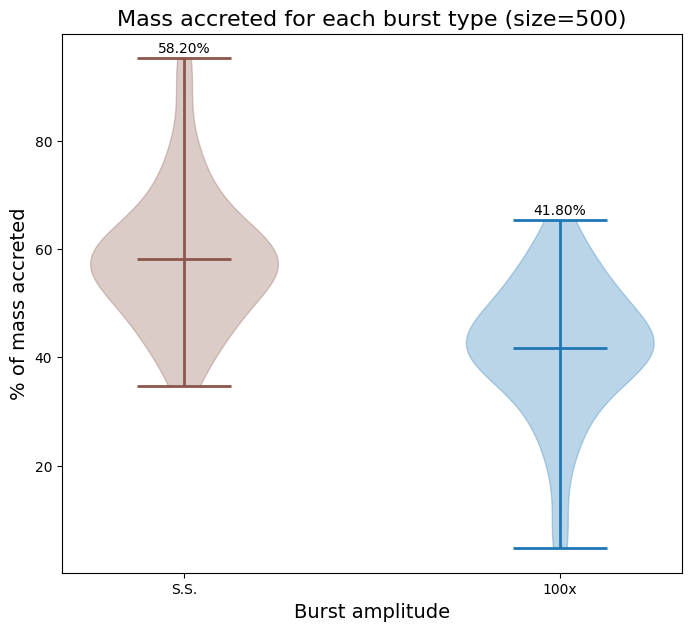

In [26]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac100_500,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_500,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_500))
string100='{:.2f}%'.format(np.mean(frac100_500))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_500)+1,string0,ha='center')
ax1.text(2,np.max(frac100_500)+1,string100,ha='center')
plt.title('Mass accreted for each burst type (size=500)',fontsize=16)
plt.show()  

# 1000 stars

## make an array of observational times

In [27]:
burst1000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst1000.npy')
L1000=np.load('/home/lee/data/cluster_size_change/100x_burst/L1000.npy')
C1000=np.load('/home/lee/data/cluster_size_change/100x_burst/C1000.npy')

In [28]:
cluster_size1000=1000
cad_L1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
            cad_L1000[i,j,k]=L1000[i,j,t_list_cadence[k]]

In [29]:
print(cad_L1000[0,128,:])

[3.37423119 3.37423119 3.37423119 3.37423119 3.37423119 3.37423119
 3.37423119 3.37423119 3.37423119 3.37423119 3.37423119 3.37423119]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [30]:
obs_burst1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for k in range(cluster_size1000):
        for j in range(1,12):
            if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==5:
                    obs_burst1000[i,k,j-30:j]=1
                    print(i,k)
            elif cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==5:
                    obs_burst1000[i,k,j:j+30]=1

0 29
0 91
0 151
0 335
0 364
0 456
0 599
0 685
0 693
0 699
0 961
1 107
1 112
1 402
1 560
1 660
1 761
1 768
1 802
1 847
1 860
1 911
2 134
2 179
2 223
2 311
2 335
2 365
2 410
2 789
2 816
2 962
2 984
3 108
3 277
3 450
3 753
3 772
3 992
4 43
4 57
4 260
4 287
4 384
4 502
4 549
4 562
4 652
4 847
4 953
5 297
5 336
5 479
5 646
5 796
5 953
5 980
5 995
6 114
6 407
6 481
6 609
6 632
6 797
6 995
7 95
7 456
7 539
7 670
7 969
7 978
8 15
8 35
8 376
8 378
8 703
9 155
9 360
9 561
9 630
9 834
9 982
10 44
10 296
10 480
10 508
10 512
10 662
10 781
10 796
10 815
10 829
10 865
10 912
11 27
11 43
11 66
11 98
11 110
11 157
11 432
11 485
11 692
11 720
12 233
12 278
12 887
12 936
13 77
13 196
13 371
13 482
13 523
13 762
13 889
13 953
14 26
14 42
14 248
14 298
14 467
14 537
14 550
14 551
14 560
14 663
14 740
14 785
14 961
15 52
15 232
15 267
15 492
15 534
15 610
15 666
15 837
15 868
15 878
16 150
16 159
16 828
16 853
17 82
17 261
17 381
17 465
17 613
17 748
17 833
17 959
17 962
18 150
18 186
18 213
18 272
18 384


## count number of zeros and ones

In [31]:
num100_1000=0
list100_1000=[]
num0_1000=0
list0_1000=[]

for i in range(run):
    for k in range(cluster_size1000):
        for j in range(0,12):
            if obs_burst1000[i,k,j]==1:
                num100_1000+=1
            elif obs_burst1000[i,k,j]==0:
                num0_1000+=1
    list100_1000.append(num100_1000)
    num100_1000=0
    list0_1000.append(num0_1000)
    num0_1000=0

## convert to mass

In [32]:
mass100_1000=[]
mass0_1000=[]
for i in range(run):
    mass100_1000.append(list100_1000[i]*100)
    mass0_1000.append(list0_1000[i]*1)

## find fraction

In [33]:
frac100_1000=[]
frac0_1000=[]
for i in range(run):
    total1000=mass100_1000[i]+mass0_1000[i]
    frac100_1000.append(100*mass100_1000[i]/total1000)
    frac0_1000.append(100*mass0_1000[i]/total1000)

## plot it

/tmp/ipykernel_60501/498061100.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


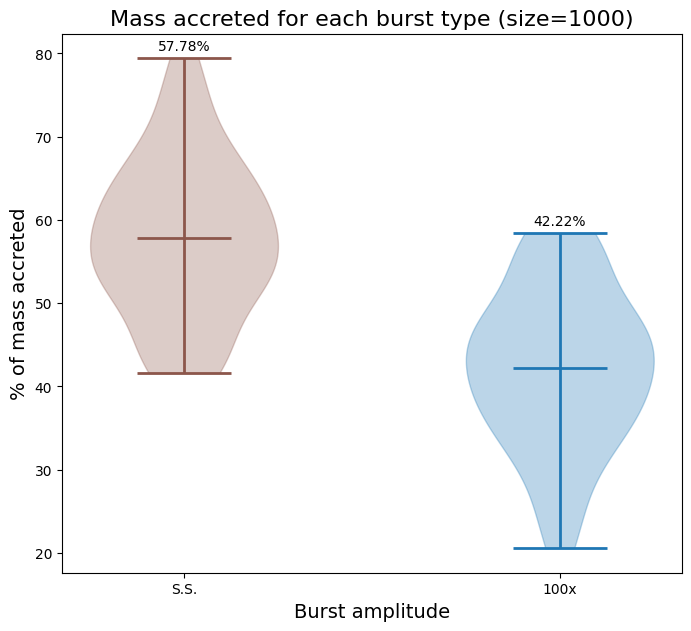

In [34]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac100_1000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_1000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_1000))
string100='{:.2f}%'.format(np.mean(frac100_1000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_1000)+1,string0,ha='center')
ax1.text(2,np.max(frac100_1000)+1,string100,ha='center')
plt.title('Mass accreted for each burst type (size=1000)',fontsize=16)
plt.show()    

# 2000 stars

## make an array of observational times

In [35]:
burst2000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst2000.npy')
L2000=np.load('/home/lee/data/cluster_size_change/100x_burst/L2000.npy')
C2000=np.load('/home/lee/data/cluster_size_change/100x_burst/C2000.npy')

In [36]:
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [37]:
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5:
                    obs_burst2000[i,k,j-30:j]=1
                    print(i,k)
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                    obs_burst2000[i,k,j:j+30]=1

0 220
0 328
0 448
0 596
0 621
0 813
0 961
0 1138
0 1159
0 1177
0 1212
0 1276
0 1413
0 1562
0 1628
0 1823
0 1836
0 1882
1 113
1 267
1 294
1 461
1 480
1 738
1 819
1 918
1 936
1 967
1 1036
1 1457
1 1477
1 1737
1 1774
2 2
2 24
2 88
2 127
2 167
2 247
2 481
2 729
2 791
2 848
2 878
2 1021
2 1142
2 1384
2 1555
2 1625
2 1676
3 30
3 78
3 230
3 336
3 405
3 424
3 1003
3 1038
3 1599
4 56
4 488
4 631
4 674
4 1016
4 1062
4 1194
4 1260
4 1469
4 1530
4 1567
4 1702
4 1719
4 1746
4 1769
5 40
5 331
5 334
5 340
5 357
5 538
5 620
5 639
5 695
5 894
5 963
5 1104
5 1168
5 1183
5 1234
5 1807
5 1872
5 1875
6 601
6 663
6 789
6 860
6 1138
6 1185
6 1346
6 1474
6 1733
6 1865
6 1999
7 124
7 347
7 370
7 471
7 568
7 1460
7 1726
7 1858
7 1908
8 61
8 131
8 192
8 412
8 423
8 428
8 630
8 743
8 899
8 910
8 958
8 988
8 999
8 1172
8 1175
8 1214
8 1225
8 1287
8 1406
8 1429
8 1652
8 1728
8 1761
9 22
9 43
9 249
9 667
9 691
9 1009
9 1151
9 1323
9 1375
9 1461
9 1877
10 201
10 321
10 336
10 577
10 632
10 636
10 704
10 727
10 809
10

## count number of zeros and ones

In [38]:
num100_2000=0
list100_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==1:
                num100_2000+=1
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list100_2000.append(num100_2000)
    num100_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

## convert to mass

In [39]:
mass100_2000=[]
mass0_2000=[]
for i in range(run):
    mass100_2000.append(list100_2000[i]*100)
    mass0_2000.append(list0_2000[i]*1)

## find fraction

In [40]:
frac100_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass100_2000[i]+mass0_2000[i]
    frac100_2000.append(100*mass100_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

## plot it

/tmp/ipykernel_60501/3165187012.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


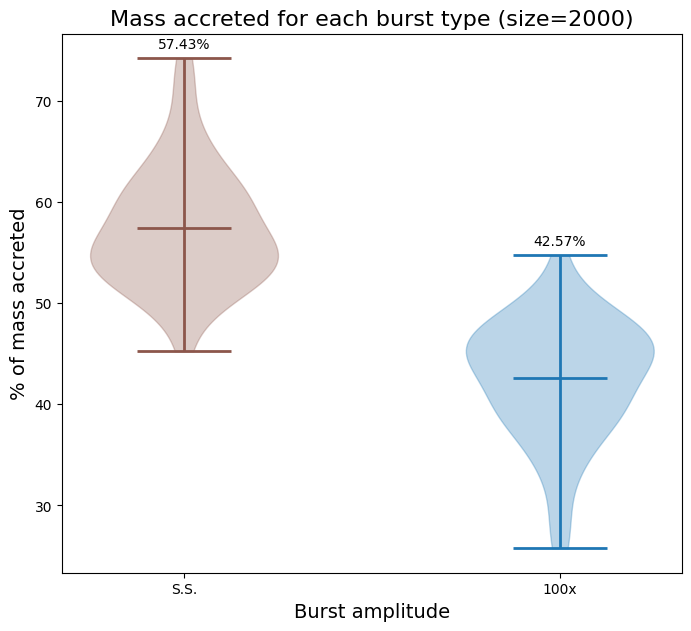

In [41]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac100_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_2000))
string100='{:.2f}%'.format(np.mean(frac100_2000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_2000)+1,string0,ha='center')
ax1.text(2,np.max(frac100_2000)+1,string100,ha='center')
plt.title('Mass accreted for each burst type (size=2000)',fontsize=16)
plt.show()    

# 5000 stars

## make an array of observational times

In [42]:
burst5000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst5000.npy')
L5000=np.load('/home/lee/data/cluster_size_change/100x_burst/L5000.npy')
C5000=np.load('/home/lee/data/cluster_size_change/100x_burst/C5000.npy')

In [43]:
cluster_size5000=5000
cad_L5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for j in range(cluster_size5000):
        for k in range(len(t_list_cadence)):
            cad_L5000[i,j,k]=L5000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [44]:
obs_burst5000=np.zeros((run,cluster_size5000,12))

In [45]:
for i in range(run):
    for k in range(cluster_size5000):
        for j in range(1,12):
            if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==5:
                obs_burst5000[i,k,j:j+30]=1
            elif cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==5:
                obs_burst5000[i,k,j-30:j]=1

## count number of zeros and ones

In [46]:
num100_5000=0
list100_5000=[]
num0_5000=0
list0_5000=[]

for i in range(run):
    for k in range(cluster_size5000):
        for j in range(0,12):
            if obs_burst5000[i,k,j]==1:
                num100_5000+=1
            elif obs_burst5000[i,k,j]==0:
                num0_5000+=1
    list100_5000.append(num100_5000)
    num100_5000=0
    list0_5000.append(num0_5000)
    num0_5000=0

## convert to mass

In [47]:
mass100_5000=[]
mass0_5000=[]
for i in range(run):
    mass100_5000.append(list100_5000[i]*100)
    mass0_5000.append(list0_5000[i]*1)

## find fraction

In [48]:
frac100_5000=[]
frac0_5000=[]
for i in range(run):
    total5000=mass100_5000[i]+mass0_5000[i]
    frac100_5000.append(100*mass100_5000[i]/total5000)
    frac0_5000.append(100*mass0_5000[i]/total5000)

## plot it

/tmp/ipykernel_60501/4285419513.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


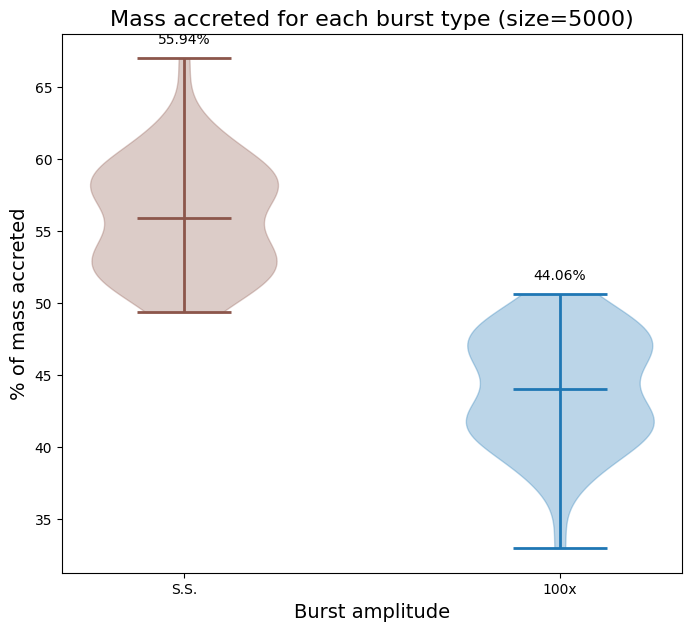

In [49]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac100_5000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_5000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_5000))
string100='{:.2f}%'.format(np.mean(frac100_5000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_5000)+1,string0,ha='center')
ax1.text(2,np.max(frac100_5000)+1,string100,ha='center')
plt.title('Mass accreted for each burst type (size=5000)',fontsize=16)
plt.show()    

In [50]:
#means and std
mean50=np.mean(frac100_50)
std50=np.std(frac100_50)
mean100=np.mean(frac100_100)
std100=np.std(frac100_100)
mean500=np.mean(frac100_500)
std500=np.std(frac100_500)
mean1000=np.mean(frac100_1000)
std1000=np.std(frac100_1000)
mean2000=np.mean(frac100_2000)
std2000=np.std(frac100_2000)
mean5000=np.mean(frac100_5000)
std5000=np.std(frac100_5000)

/tmp/ipykernel_60501/2812840051.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])


Text(0.5, 1.0, 'Observational mass accreted from big bursts for each cluster size')

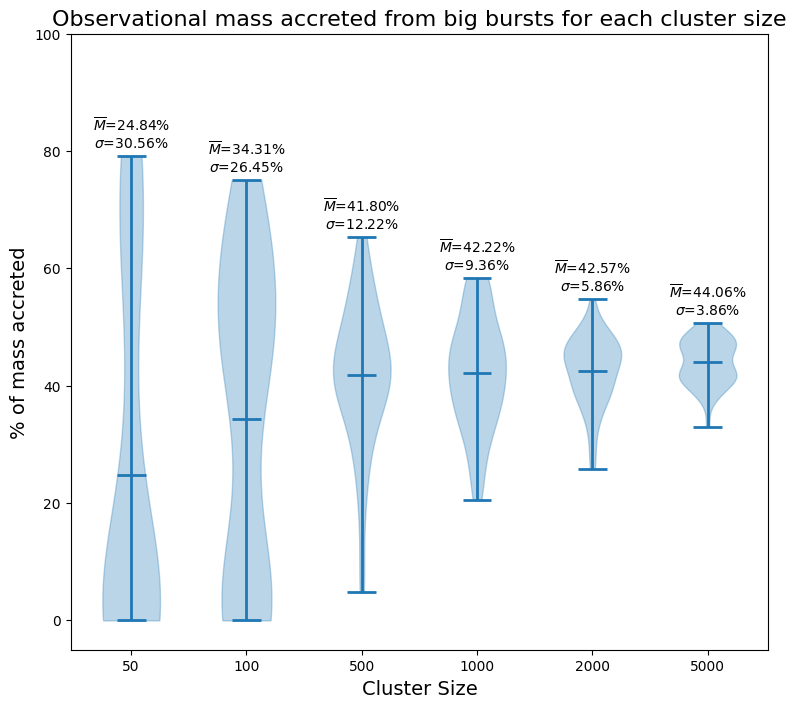

In [51]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac100_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac100_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 

v0=ax1.violinplot(frac100_500,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac100_1000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac100_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac100_5000,positions=[6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Cluster Size',fontsize=14)
    
string50mean='{:.2f}%'.format(mean50)
string50std='{:.2f}%'.format(std50)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)
string500mean='{:.2f}%'.format(mean500)
string500std='{:.2f}%'.format(std500)
string1000mean='{:.2f}%'.format(mean1000)
string1000std='{:.2f}%'.format(std1000)
string2000mean='{:.2f}%'.format(mean2000)
string2000std='{:.2f}%'.format(std2000)
string5000mean='{:.2f}%'.format(mean5000)
string5000std='{:.2f}%'.format(std5000)

#ax1.locator_params(axis='x',nbins=2)
ax1.set_ylim(-5,100)
ax1.text(1,np.max(frac100_50)+4.25,'$\overline{M}$='+string50mean,ha='center')
ax1.text(1,np.max(frac100_50)+1.5,'$\sigma$='+string50std,ha='center')
ax1.text(2,np.max(frac100_100)+4.25,'$\overline{M}$='+string100mean,ha='center')
ax1.text(2,np.max(frac100_100)+1.5,'$\sigma$='+string100std,ha='center')
ax1.text(3,np.max(frac100_500)+4.25,'$\overline{M}$='+string500mean,ha='center')
ax1.text(3,np.max(frac100_500)+1.5,'$\sigma$='+string500std,ha='center')
ax1.text(4,np.max(frac100_1000)+4.25,'$\overline{M}$='+string1000mean,ha='center')
ax1.text(4,np.max(frac100_1000)+1.5,'$\sigma$='+string1000std,ha='center')
ax1.text(5,np.max(frac100_2000)+4.25,'$\overline{M}$='+string2000mean,ha='center')
ax1.text(5,np.max(frac100_2000)+1.5,'$\sigma$='+string2000std,ha='center')
ax1.text(6,np.max(frac100_5000)+4.25,'$\overline{M}$='+string5000mean,ha='center')
ax1.text(6,np.max(frac100_5000)+1.5,'$\sigma$='+string5000std,ha='center')


plt.title('Observational mass accreted from big bursts for each cluster size',fontsize=16)
#plt.savefig('/home/lee/research/figs/observational/observational_mass_size_change_violinplot.jpeg',dpi=300,bbox_inches='tight')
#plt.show()  

In [54]:
print('max=',np.max(frac100_2000))
print('min=',np.min(frac100_2000))
print('mean=',np.mean(frac100_2000))
error2000up=(np.max(frac100_2000)-np.mean(frac100_2000))/((np.max(frac100_2000)+np.mean(frac100_2000))/2)
error2000down=(np.mean(frac100_2000)-np.min(frac100_2000))/((np.min(frac100_2000)+np.mean(frac100_2000))/2)
print(error2000up)
print(error2000down)
avg2000=(error2000up+error2000down)/2
print(avg2000*100)

max= 54.757407513403166
min= 25.762796039358104
mean= 42.574457941355625
0.25033835558633866
0.4920204112018356
37.11793833940871


In [55]:
print('max=',np.max(frac100_1000))
print('min=',np.min(frac100_1000))
print('mean=',np.mean(frac100_1000))
print(np.max(frac100_1000)/np.mean(frac100_1000))
error1000up=(np.max(frac100_1000)-np.mean(frac100_1000))/((np.max(frac100_1000)+np.mean(frac100_1000))/2)
print(error1000up)
error1000down=(np.mean(frac100_1000)-np.min(frac100_1000))/((np.min(frac100_1000)+np.mean(frac100_1000))/2)
print(error1000down)
avg1000=(error1000up+error1000down)/2
print(avg1000*100)

max= 58.38081170429767
min= 20.57203530426704
mean= 42.222492970679376
1.382694568623391
0.3212283887854697
0.6895651026030679
50.539674569426886
